In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_cities(count: int = 10, size: float = 10.0) -> np.array:
    cities = np.random.rand(count, 2) * size
    return cities

In [3]:
def calc_dist(point_1: np.array, point_2: np.array) -> float:
    distance = np.sqrt(np.sum(np.power((point_1 - point_2), 2)))
    return distance

In [4]:
def apply_route(cities: np.array, route: np.array) -> np.array:
    route = np.array([cities[i] for i in route])
    return route

In [5]:
def calc_energy(cities: np.array, route: np.array) -> float:
    energy = 0
    cities = apply_route(cities, route)
    for i in range(route.shape[0] - 1):
        energy += calc_dist(cities[i], cities[i + 1])
    energy += calc_dist(cities[-1], cities[0])
    return energy

In [6]:
def two_opt_swap(route: np.array) -> np.array:
    alt_route = route.copy()
    i, j = np.sort(np.random.randint(alt_route.shape, size=2))
    alt_route[i:j + 1] = alt_route[i:j + 1][::-1]
    return alt_route

In [7]:
def calc_transition_prob(delta_energy: float, temp: float) -> float:
    prob = np.exp(-delta_energy / temp)
    return prob

In [8]:
def is_transition(prob: float) -> bool:
    answer = np.random.rand(1) <= prob
    return answer

In [9]:
def decrease_temp(temp: float, k: int) -> float:
    temp = temp * 0.1 / (k + 1)
    return temp

In [10]:
def optimize_route(cities: np.array, init_temp: float, end_temp: float, max_iterations: int = 20_000) -> np.array:
    temp = init_temp
    route = np.arange(cities.shape[0])
    energy = calc_energy(cities, route)
    print('Initial route length:', energy)
    for i in range(max_iterations):
        new_route = two_opt_swap(route)
        new_energy = calc_energy(cities, new_route)
        if new_energy < energy:
            route = new_route
            energy = new_energy
        else:
            prob = calc_transition_prob(new_energy - energy, temp)
            if is_transition(prob):
                route = new_route
                energy = new_energy
        temp = decrease_temp(init_temp, i)
        if temp <= end_temp:
            break
    print('Final route length:', energy)
    return route

In [11]:
def create_plot(cities: np.array, ax: plt.Axes) -> None:
    cities = np.vstack([cities, cities[0]])
    x, y = cities.T
    ax.plot(x, y)

In [12]:
N = 100
SIZE = 10
T_START = 100
T_STOP = 0

Initial route length: 535.9850679675855
Final route length: 89.50092303903047
CPU times: total: 17.7 s
Wall time: 29.4 s


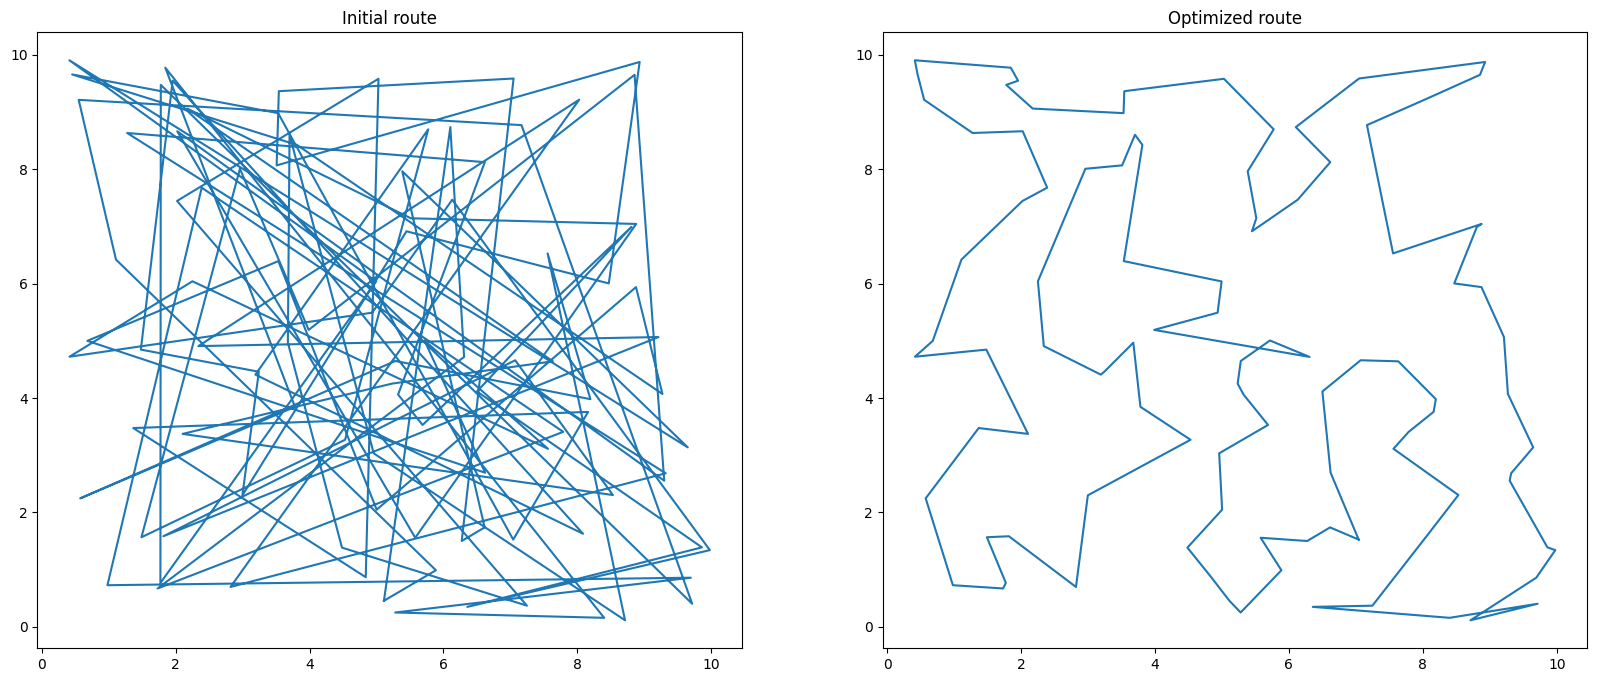

In [13]:
%%time
cities = create_cities(N, SIZE)
route = optimize_route(cities, T_START, T_STOP)
routed_cities = apply_route(cities, route)
fig, axs = plt.subplots(1, 2)
for points, ax, title in [[cities, axs[0], 'Initial route'], [routed_cities, axs[1], 'Optimized route']]:
    create_plot(points, ax)
    ax.set(title=title)
fig.set_size_inches(20, 8)